In [116]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, SpectralClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn import datasets
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

In [80]:
N = 1000
m_1, m_2, m_3 = [0, 0], [3, -1], [-1, 2]
d_1, d_2, d_3 = [0.3, 0.3], [0.6, 0.3], [0.3, 0.6]

In [81]:
X = np.zeros((N * 3, 2))

In [82]:
np.random.seed(seed=100)

In [83]:
X[:N,0] = np.random.normal(loc=m_1[0], scale=d_1[0], size=N)
X[:N,1] = np.random.normal(loc=m_1[1], scale=d_1[1], size=N)

X[N:2*N,0] = np.random.normal(loc=m_2[0], scale=d_2[0], size=N)
X[N:2*N,1] = np.random.normal(loc=m_2[1], scale=d_2[1], size=N)

X[2*N:3*N,0] = np.random.normal(loc=m_3[0], scale=d_3[0], size=N)
X[2*N:3*N,1] = np.random.normal(loc=m_3[1], scale=d_3[1], size=N)

<IPython.core.display.Javascript object>


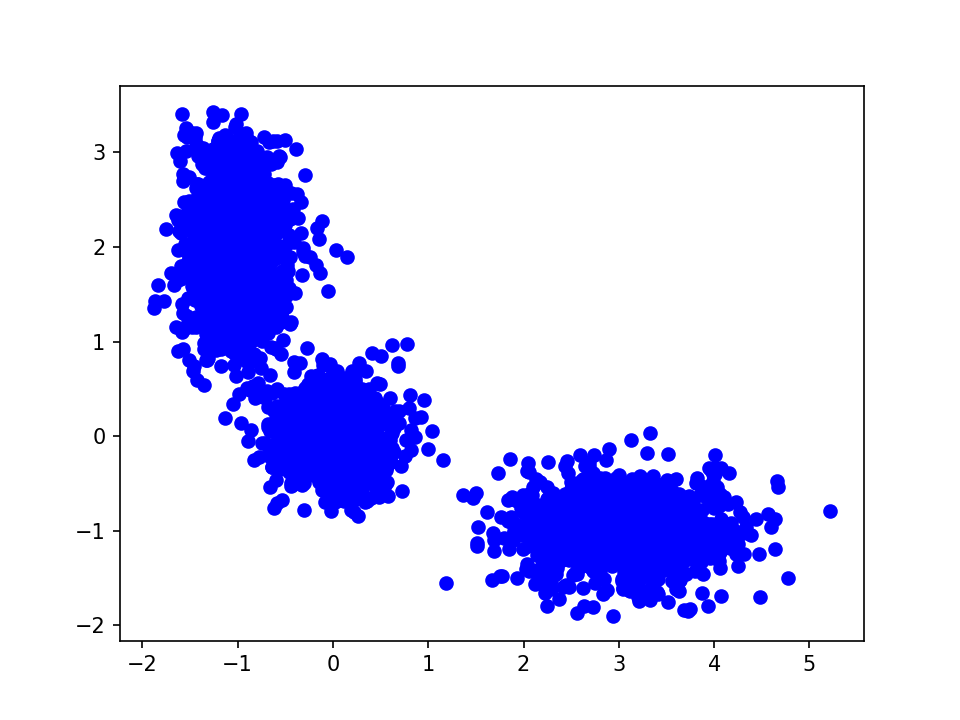

In [47]:
plt.plot(X[:,0], X[:,1], 'bo')

In [48]:
kmeans = KMeans(n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=100,
    copy_x=True,
    n_jobs=None,
    algorithm='auto')

In [57]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [58]:
y = kmeans.fit_predict(X)

<IPython.core.display.Javascript object>


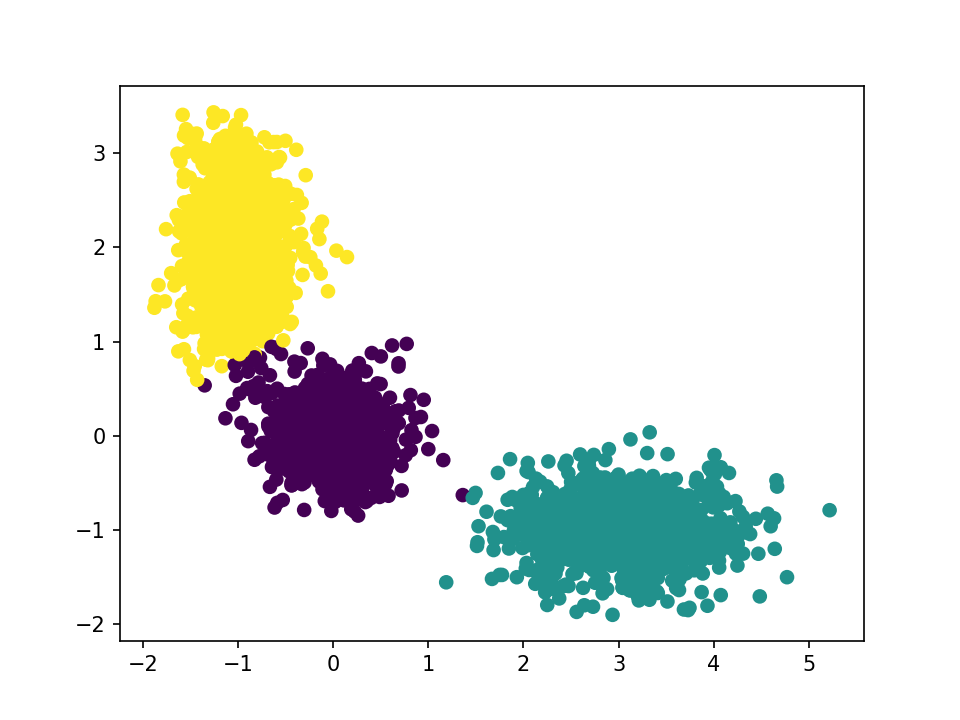

In [59]:
plt.scatter(X[:,0], X[:,1], c=y)

<IPython.core.display.Javascript object>


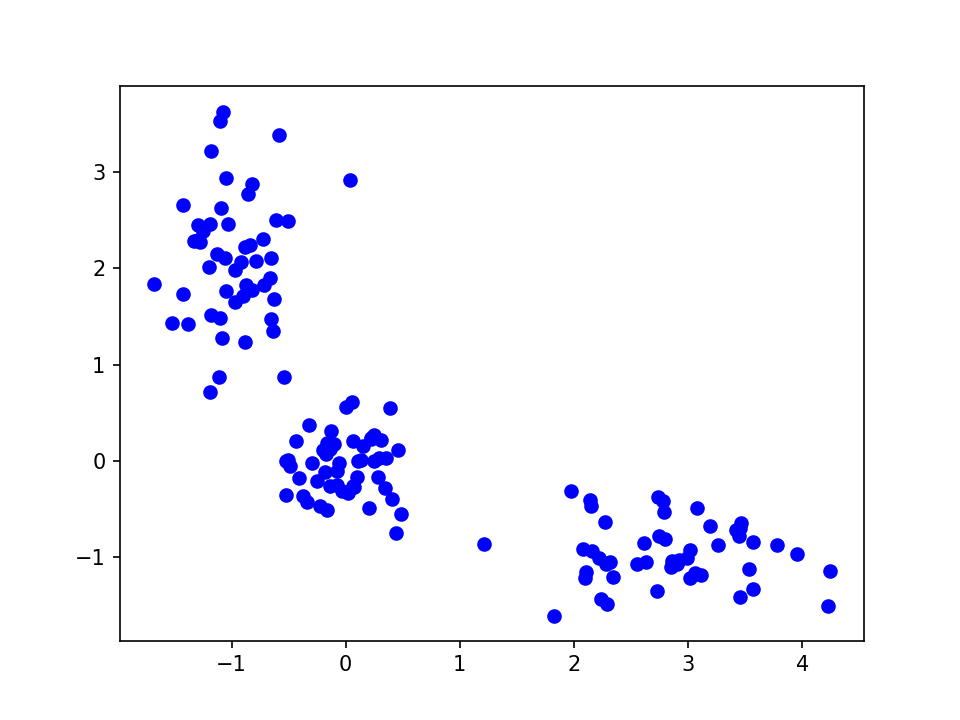

In [64]:
plt.plot(X[:,0], X[:,1], 'bo')

In [65]:
d_mat = pdist(X)

In [66]:
a_c = hierarchy.linkage(d_mat, 'single')

<IPython.core.display.Javascript object>


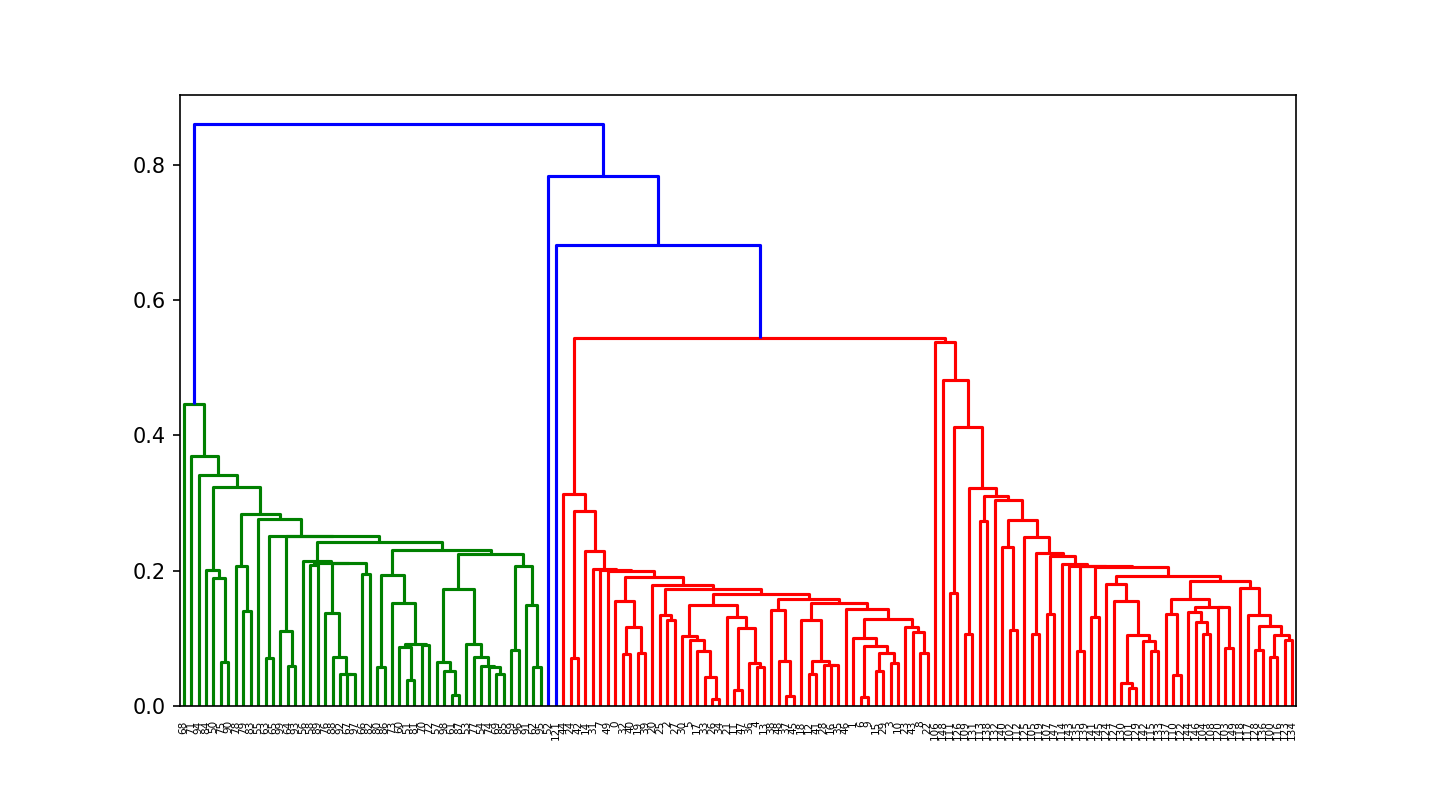

{'icoord': [[55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [35.0, 35.0, 52.5, 52.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [175.0, 175.0, 185.0, 185.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [195.0, 195.0, 213.75, 213.75],
  [245.0, 245.0, 255.0, 255.0],
  [204.375, 204.375, 250.0, 250.0],
  [180.0, 180.0, 227.1875, 227.1875],
  [165.0, 165.0, 203.59375, 203.59375],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [325.0, 325.0, 335.0, 335.0],
  [302.5, 302.5, 330.0, 330.0],
  [285.0, 285.0, 316.25, 316.25],
  [270.0, 270.0, 300.625, 300.625],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [345.0, 345.0, 362.5, 362.5],
  [425.0, 425.0, 435.0, 435.0],
  [415.0, 415.0, 430.0, 430.0],
  [405.0, 405.0, 422.5, 422.5],
  [395.0, 395.0, 413.75,

In [71]:
hierarchy.dendrogram(a_c)

In [84]:
gm = GaussianMixture(n_components=3, covariance_type='full',
    tol=0.001,
    reg_covar=1e-06,
    max_iter=100,
    n_init=1,
    init_params='kmeans',
    weights_init=None,
    means_init=None,
    precisions_init=None,
    random_state=None,
    warm_start=False,
    verbose=0,
    verbose_interval=10)

In [85]:
gm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [86]:
y = gm.fit_predict(X)

<IPython.core.display.Javascript object>


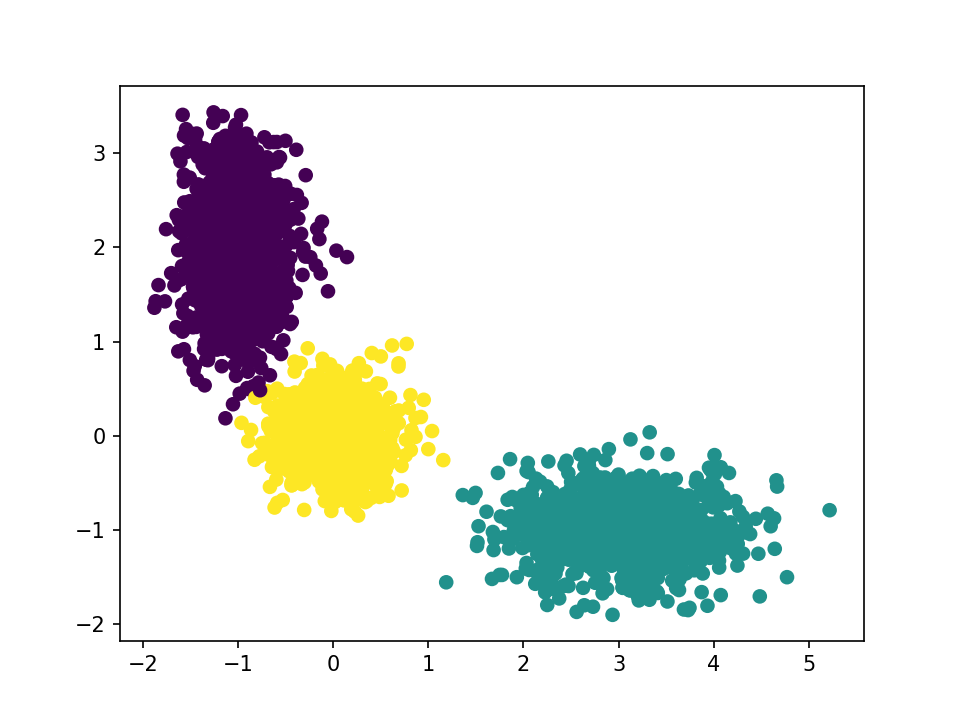

In [87]:
plt.scatter(X[:,0], X[:,1], c=y)

In [89]:
data = datasets.load_digits()

In [90]:
X, y = data.data,data.target

In [102]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [95]:
X.shape

(1797, 64)

In [92]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [96]:
y.shape

(1797,)

In [104]:
X[0].reshape([8,8])

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<IPython.core.display.Javascript object>


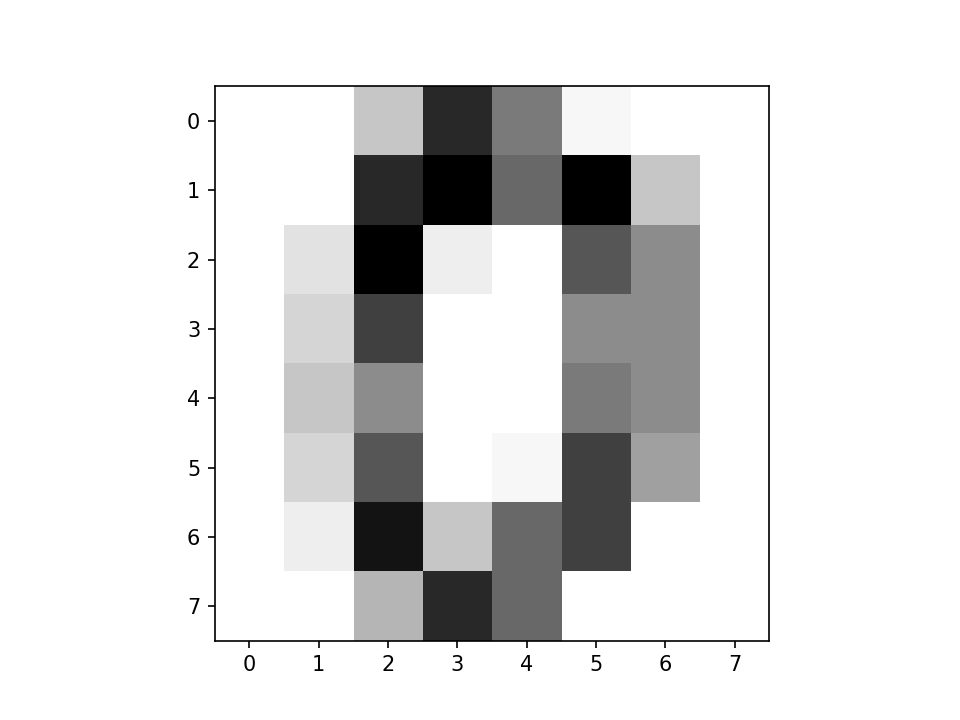

In [106]:
plt.imshow(X[0].reshape([8,8]), cmap='Greys')

<IPython.core.display.Javascript object>


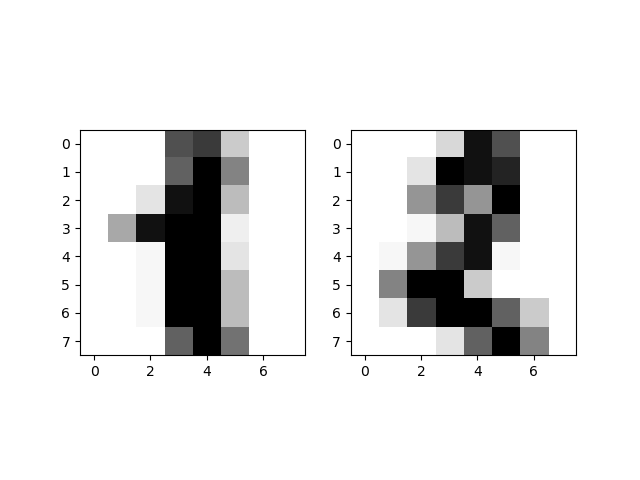

In [115]:
plt.subplot(1, 2, 1)
plt.imshow(X[1].reshape([8,8]), cmap='Greys')
plt.subplot(1, 2, 2)
plt.imshow(X[2].reshape([8,8]), cmap='Greys')


In [108]:
digits_kmeans = KMeans(n_clusters=10,
    init='k-means++',
    n_init=10,
    max_iter=500,
    tol=0.0001,
    precompute_distances='auto',
    verbose=0,
    random_state=100,
    copy_x=True,
    n_jobs=None,
    algorithm='auto')

In [109]:
digits_kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [110]:
y = digits_kmeans.fit_predict(X)

In [111]:
y

array([4, 8, 8, ..., 8, 9, 9])

In [141]:
dbscan = DBSCAN(eps=0.000001,
    min_samples=5,
    metric='euclidean',
    metric_params=None,
    algorithm='auto',
    leaf_size=30,
    p=None,
    n_jobs=None)

In [142]:
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=1e-06, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=50, n_jobs=None, p=None)

In [143]:
y = dbscan.fit_predict(X)

In [144]:
np.unique(y)

array([-1], dtype=int64)

In [150]:
ag_cl = AgglomerativeClustering(n_clusters=10,
    affinity='euclidean',
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    pooling_func='deprecated',
    distance_threshold=None,)

In [151]:
ag_cl.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [152]:
y = ag_cl.fit_predict(X)

In [153]:
y

array([7, 9, 4, ..., 4, 1, 4], dtype=int64)

In [154]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)